
## Dataset Description
 The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. • All the features are numeric i.e. geometric features extracted from the silhouette. 

## Problem statement
 Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data. 
## Data Dictionary
1- compactness

2- circularity

3- distance_circularity

4- radius_ratio

5- pr.axis_aspect_ratio

6- max.length_aspect_ratio

7- scatter_ratio

8- elongatedness

9- pr.axis_rectangularity

10- max.length_rectangularity

11- scaled_variance

12- scaled_variance.1

13- scaled_radius_of_gyration

14- scaled_radius_of_gyration.1

15- skewness_about

16- skewness_about.1

17- skewness_about.2

18- hollows_ratio

19- class

## 1. Import the Libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

## 2. Load the dataset

In [2]:
data_original=pd.read_csv("Part3 - vehicle.csv")

In [3]:
data_original.shape

(846, 19)

In [4]:
data_original.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
data_original.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

## EDA

In [6]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
#prepare original coluns
df_original_cols=list(data_original.columns)

In [8]:
data_original.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

- as we can see that the different variables present different value ranges, therefore have different magnitute.
- not only the minimum and maximum values are different, but they also spread over ranges of different widths also.
- Thus this data set is a potential candidate for normalization

In [9]:
data_original.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# imputing missing Values
for col in data_original.drop("class",axis=1).columns:
    
    data_original[col]=data_original[col].fillna(data_original[col].median())

In [11]:
data_original.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
# Explore distribution of vehicle in each class
data_original['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

- Cars are almost double in number as compared to bus and van. van is least in number

## Univariate Analysis
### 1 General EDA
### 1.1 Target: class


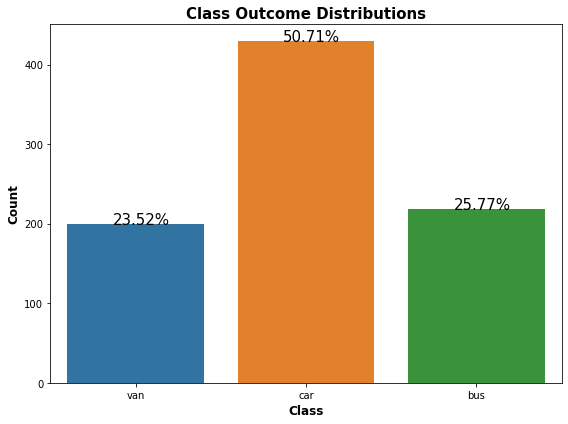

In [13]:
plt.figure(figsize=(8,6))
t=sns.countplot(x=data_original["class"]);
t.set_xlabel("Class",fontweight = 'bold', fontsize = 12)
t.set_ylabel("Count",fontweight = 'bold', fontsize = 12)
plt.title('Class Outcome Distributions', fontsize = 15, fontweight = 'bold')
for p in t.patches:
    txt=str(((p.get_height()/len(data_original["class"]))*100).round(2)) + '%'
    txt_x=p.get_x()+p.get_width()/3
    txt_y=p.get_height()
    t.text(txt_x,txt_y,txt,fontsize=15)

plt.tight_layout()

This is imbalanced data

### 1.2 Features: Numerical

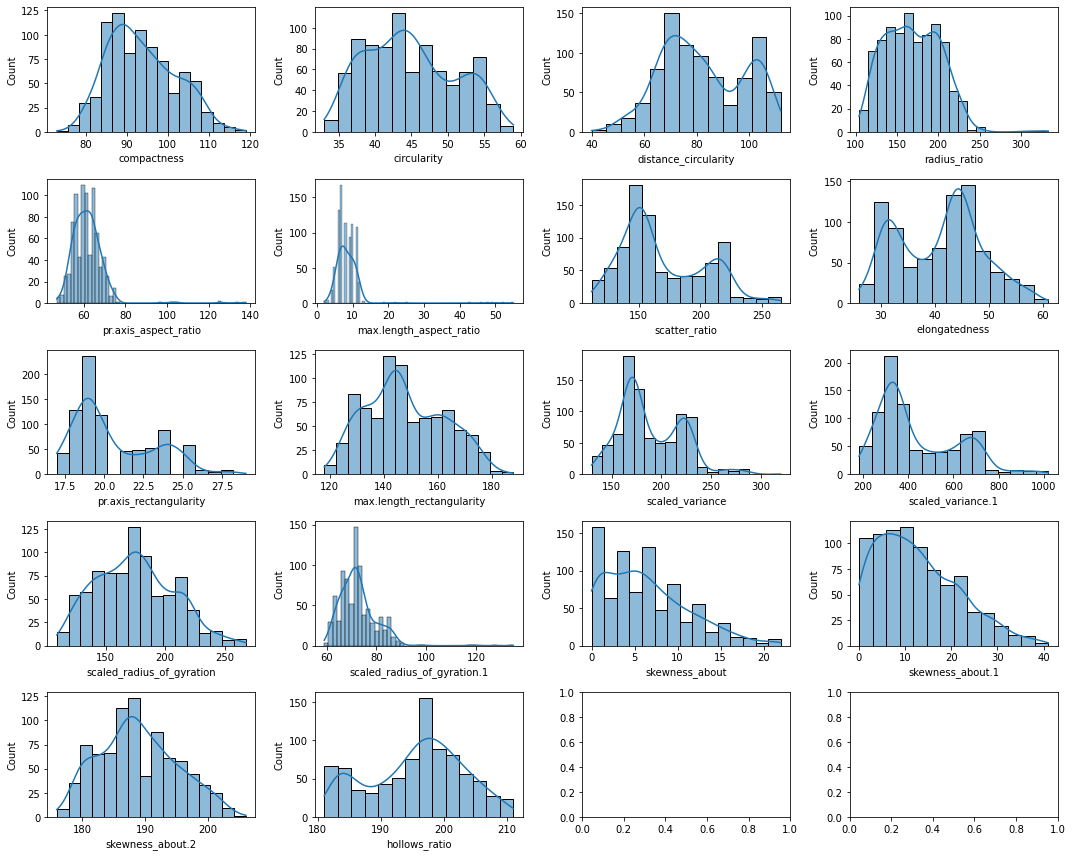

In [14]:
plt.subplots(5,4,figsize=(15,12))
for i ,col in enumerate(data_original.drop("class",axis=1).columns):
    i+=1
    plt.subplot(5,4,i)
    sns.histplot(x=data_original[col],kde=True)
    plt.tight_layout()

- pr.axis_aspect_ratio ,max.length_aspect_ratio,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1 are highly positively skewed in nature
- distance_circularity,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,hollows_ratio have bimodal distribution


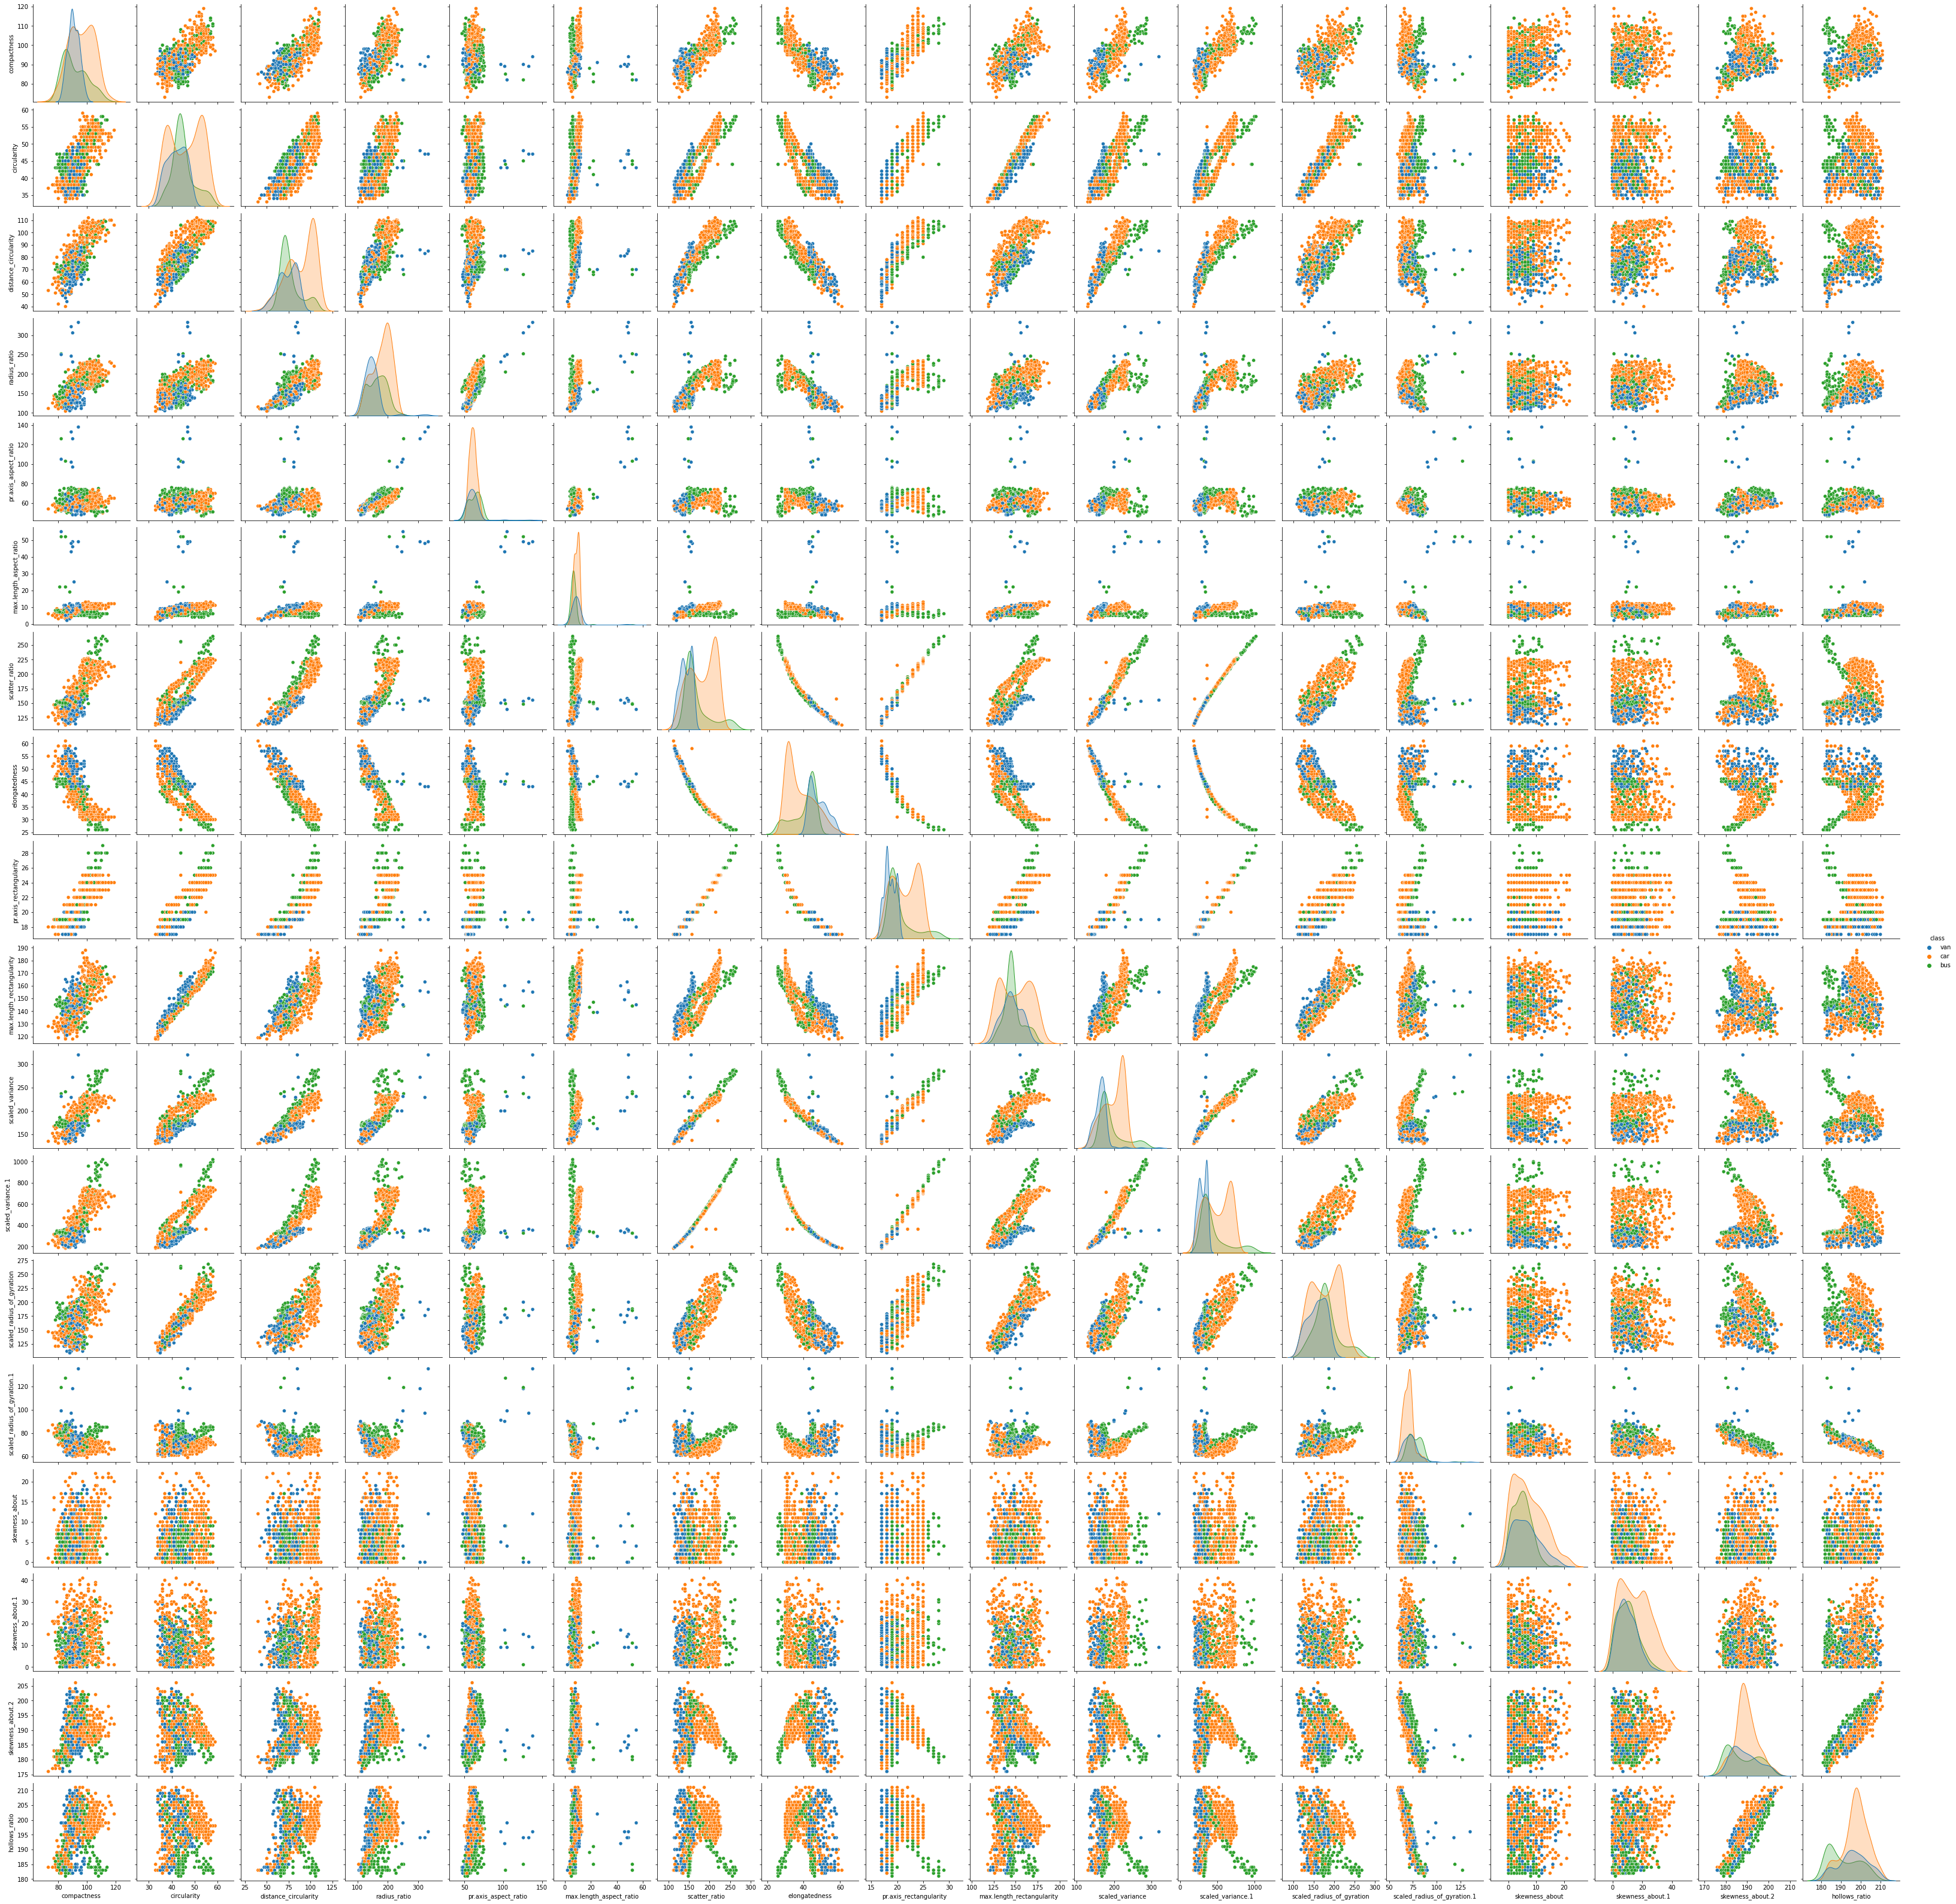

In [15]:
sns.pairplot(data_original,hue="class")

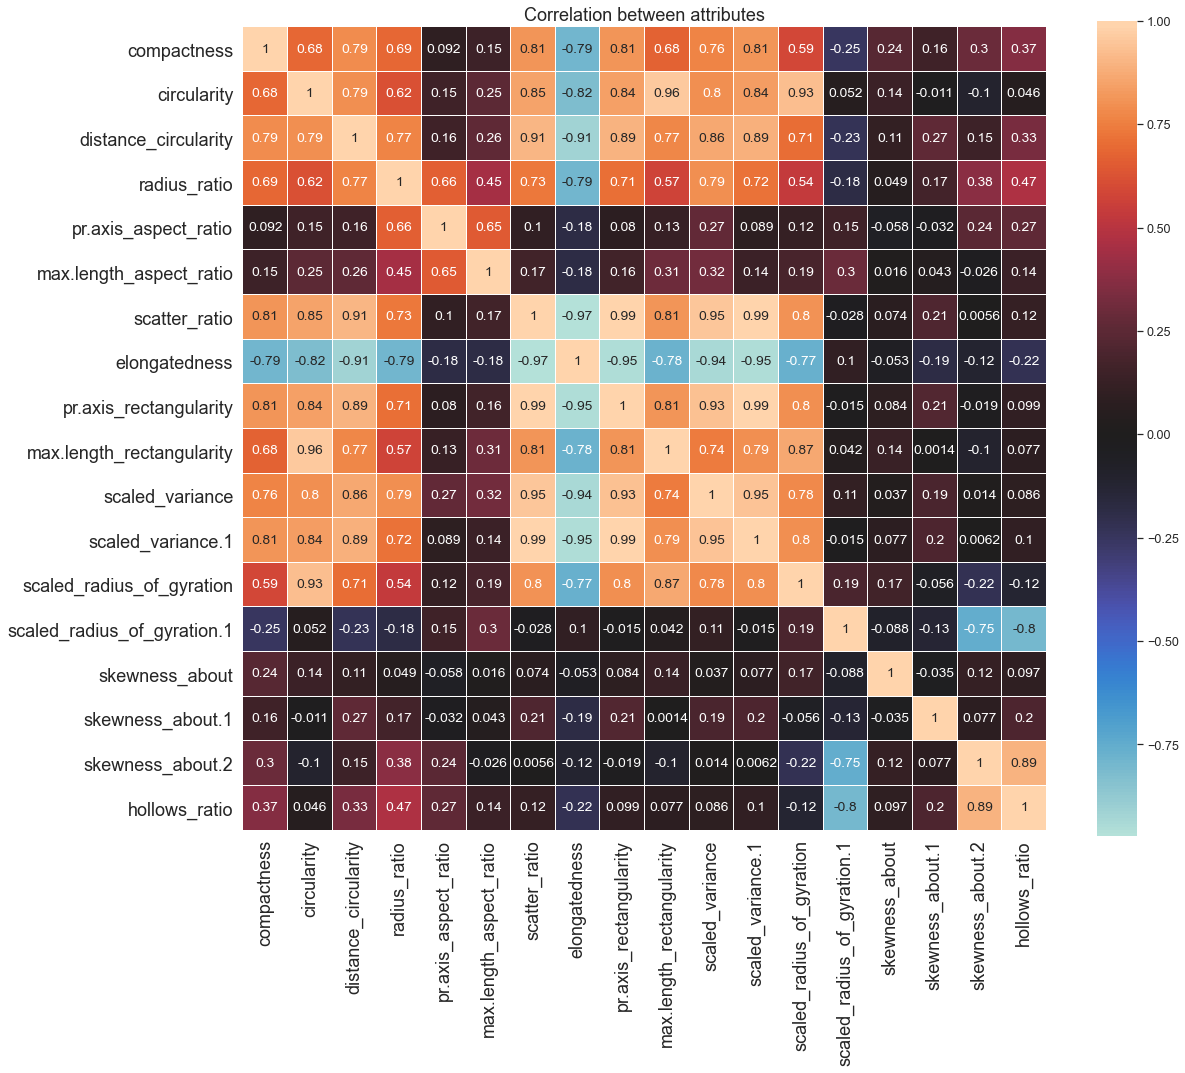

In [18]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(18,15))
sns.heatmap(data_original.corr(), annot=True,linewidths=0.01,center=0,linecolor="white",square=True)
plt.title('Correlation between attributes',fontsize=18)
plt.tick_params(labelsize=18)

- It shows that there are some attributes which are highly correlated as there corelation value is very high.
- For example: compactness is highly correlated in a positive way with scatter_ratio, pr.axis_rectangularity, scaled_variance1, distance_circularity, scaled_variance, radius_ratio. 
- compactness is highly negatively correlated with elongatedness.
- circularity has high positive correlation with scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration
- compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
- circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
- distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
- radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.


In [19]:
data_original.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              423
scaled_radius_of_gyration      144
scaled_radius_of_gyration.1     40
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <a list of 18 Text major ticklabel objects>)

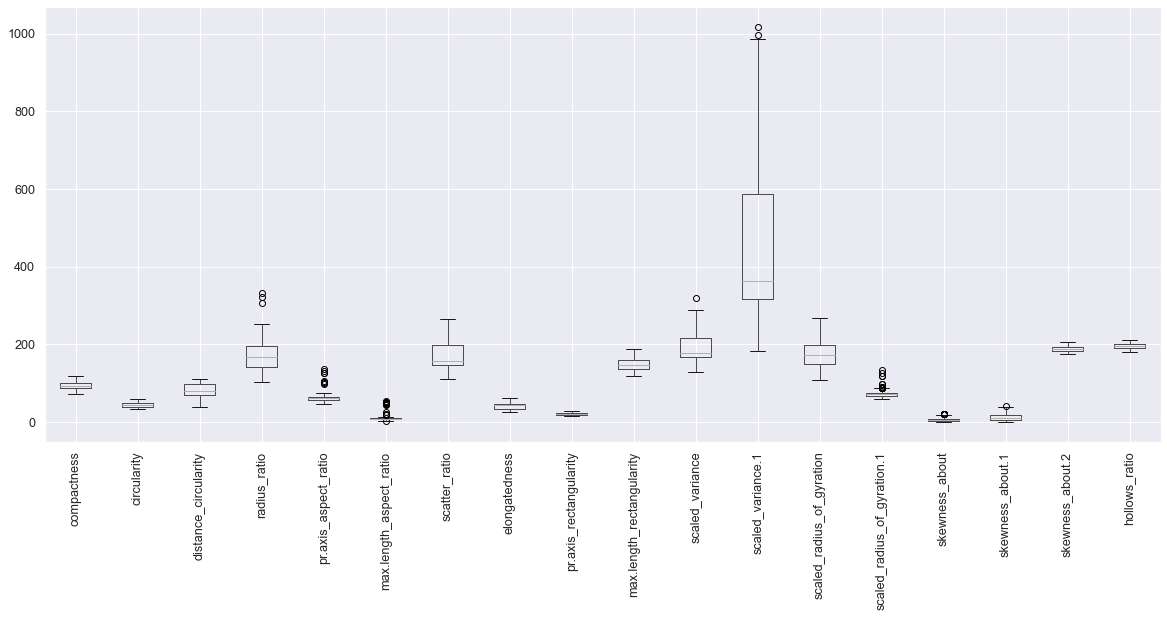

In [20]:
#Checking the outliers
plt.figure(figsize=(20,8))
data_original.boxplot()
plt.xticks(rotation=90)

### Handling Outliers

In [21]:
## function to find outliers and quantile values.
# We will analyse each of the outliers and follow below strategy
# 1. High outliers will be replaced by fence_high = q3+1.5*iqr
# 2. Low outlier will be replaced by fence_low  = q1-1.5*iqr

def handleOutlier(df,feature):
    
    q1 = np.percentile(df[feature],25)
    q3 = np.percentile(df[feature],75)
   
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = df[feature][(df[feature] < fence_low)]
    outliers_high= df[feature][(df[feature] > fence_high)]
    
    if len(outliers_low) and len(outliers_high):
        df.loc[outliers_low.index.tolist(),feature]=fence_low
        df.loc[outliers_high.index.tolist(),feature]=fence_high
        
    elif len(outliers_low):
        df.loc[outliers_low.index.tolist(),feature]=fence_low
        
    elif len(outliers_high):
        df.loc[outliers_high.index.tolist(),feature]=fence_high
    
    

In [22]:
handleOutlier(data_original,"compactness")
handleOutlier(data_original,"radius_ratio")
handleOutlier(data_original,"pr.axis_aspect_ratio")
handleOutlier(data_original,"max.length_aspect_ratio")
handleOutlier(data_original,"scaled_variance")
handleOutlier(data_original,"scaled_variance.1")
handleOutlier(data_original,"scaled_radius_of_gyration.1")
handleOutlier(data_original,"skewness_about")
handleOutlier(data_original,"skewness_about.1")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <a list of 18 Text major ticklabel objects>)

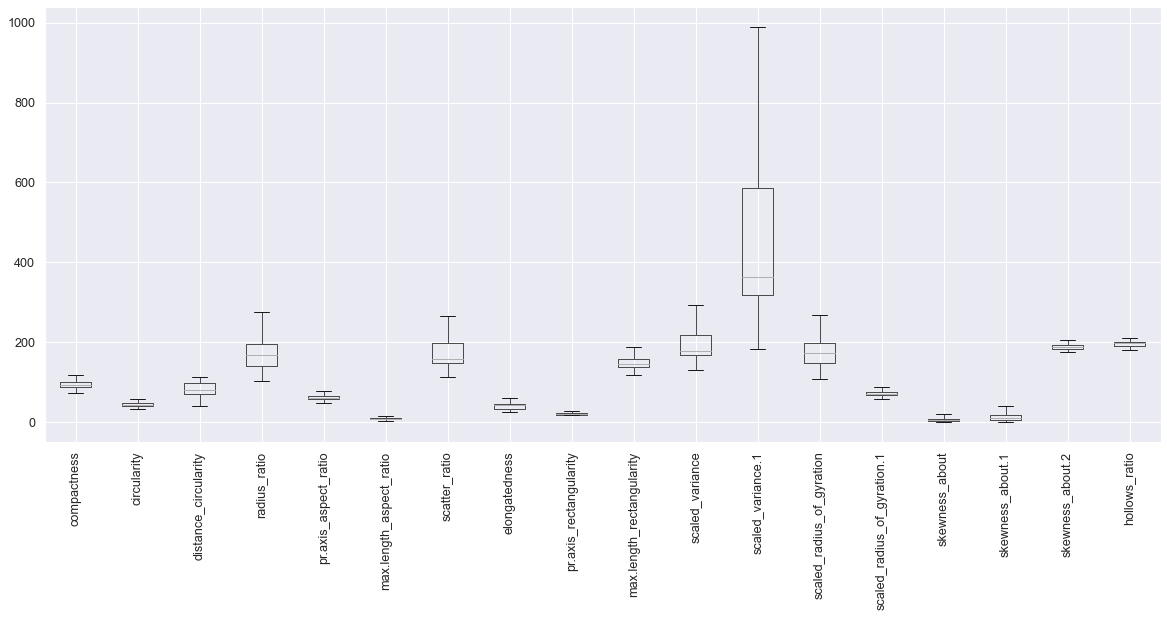

In [23]:
#Checking the outliers after outliers removal
plt.figure(figsize=(20,8))
data_original.boxplot()
plt.xticks(rotation=90)

## Data PreProcessing

In [24]:
X=data_original.drop("class",axis=1)
y=data_original["class"]

In [25]:
from scipy.stats import zscore
XScaled=X.apply(zscore)

In [26]:
XScaled.shape

(846, 18)

In [27]:
XScaled

compactness  circularity  distance_circularity  radius_ratio  \
0       0.160580     0.518073              0.057177      0.283349   
1      -0.325470    -0.623732              0.120741     -0.846077   
2       1.254193     0.844303              1.519141      1.229624   
3      -0.082445    -0.623732             -0.006386     -0.296627   
4      -1.054545    -0.134387             -0.769150      1.107524   
..           ...          ...                   ...           ...   
841    -0.082445    -0.949961              0.311432      0.435974   
842    -0.568495     0.191843              0.120741     -0.174527   
843     1.497218     1.496763              1.201323      1.626449   
844    -0.933032    -1.439306             -0.260641     -0.693452   
845    -1.054545    -1.439306             -1.023405     -1.395527   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.838727                 0.814478      -0.207598   
1               -0.740409                 0.361007      -0.599423   
2                0.807072                 0.814478       1.148719   
3                0.291245                 0.361007      -0.750125   
4                2.698439                 2.855095      -0.599423   
..                    ...                      ...            ...   
841              0.463188                -0.092463       0.003385   
842              0.807072                 1.267948      -0.298019   
843              0.979015                 1.721419       1.600825   
844             -0.568467                -0.545933      -1.021388   
845             -1.084294                -1.452874      -1.473494   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0         0.136262               -0.224342                   0.758332   
1         0.520519               -0.610886                  -0.344578   
2        -1.144597                0.935290                   0.689401   
3         0.648605               -0.610886                  -0.344578   
4         0.520519               -0.610886                  -0.275646   
..             ...                     ...                        ...   
841      -0.119910               -0.224342                  -0.964965   
842       0.264347               -0.224342                   0.758332   
843      -1.400769                1.708378                   1.723379   
844       1.160948               -0.997430                  -1.654284   
845       1.929463               -1.383974                  -1.378557   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0          -0.402459          -0.341956                   0.285705   
1          -0.594658          -0.619967                  -0.513630   
2           1.103100           1.110505                   1.392477   
3          -0.914990          -0.739114                  -1.466683   
4           1.679696          -0.648335                   0.408680   
..               ...                ...                        ...   
841         0.366337          -0.097988                  -0.790323   
842        -0.498559          -0.404367                   0.039756   
843         1.263265           1.598441                   0.777604   
844        -1.075156          -0.960387                  -0.821066   
845        -1.555653          -1.289460                  -1.343709   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.343057       -0.070161          0.381161   
1                      -0.033812        0.550291          0.156995   
2                       0.120810        1.584377         -0.403418   
3                      -1.425413       -0.070161         -0.291335   
4                       2.285523        0.550291         -0.179253   
..                           ...             ...               ...   
841                    -0.033812        0.136656          1.389905   
842                    -0.033812       -1.104248          0.829491   

In [28]:
#splitting the data in train test split
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.3,stratify=y,random_state=1)

In [29]:
print("shape of X_train before PCA",X_train.shape)
print("shape of X_test before PCA",X_test.shape)
print("shape of y_train before PCA",y_train.shape)
print("shape of y_test before PCA",y_test.shape)


shape of X_train before PCA (592, 18)
shape of X_test before PCA (254, 18)
shape of y_train before PCA (592,)
shape of y_test before PCA (254,)


## Modelling before PCA using SVM 
### linear kernel

In [30]:
import timeit
start = timeit.default_timer()
#using linear kernel
svm_clf_linear= svm.SVC(kernel="linear",class_weight="balanced")

In [31]:
svm_clf_linear.fit(X_train,y_train)
stop = timeit.default_timer()
print("Total time taken\n",str(stop - start) +" " + "Seconds")

Total time taken
 0.6636707000016031 Seconds


In [32]:
y_pred=svm_clf_linear.predict(X_test)

In [33]:
print("training accuracy",svm_clf_linear.score(X_train,y_train))
print("test accuracy",svm_clf_linear.score(X_test,y_test))
print("Classification report",classification_report(y_test,y_pred))


training accuracy 0.956081081081081
test accuracy 0.9448818897637795
Classification report               precision    recall  f1-score   support

         bus       0.92      0.94      0.93        65
         car       0.98      0.93      0.96       129
         van       0.89      0.98      0.94        60

    accuracy                           0.94       254
   macro avg       0.93      0.95      0.94       254
weighted avg       0.95      0.94      0.95       254



Confusion Matrix


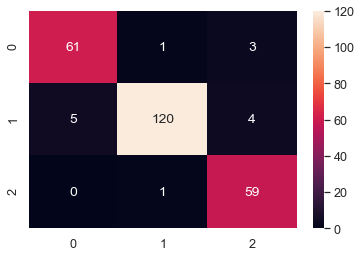

In [34]:
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f');

### rbf kernel

In [35]:
#using rbf kernel
svm_clf_rbf= svm.SVC(kernel="rbf",class_weight="balanced")

In [36]:
svm_clf_rbf.fit(X_train,y_train)
y_pred1=svm_clf_rbf.predict(X_test)

In [37]:
print("training accuracy",svm_clf_rbf.score(X_train,y_train).round(3))
print("test accuracy",svm_clf_rbf.score(X_test,y_test).round(3))
print("=========Classification report========")
print(classification_report(y_test,y_pred1))

training accuracy 0.97
test accuracy 0.953
=========Classification report========
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        65
         car       1.00      0.92      0.96       129
         van       0.85      1.00      0.92        60

    accuracy                           0.95       254
   macro avg       0.94      0.96      0.95       254
weighted avg       0.96      0.95      0.95       254



Confusion Matrix


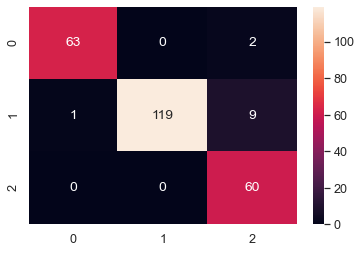

In [38]:
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='.0f');

### Insights
- Svm with rbf kernel is performing slightly better than linear kernel
- out of 65 bus  linear kernel has predicted 61 bus correctly and rbf has predicted 63 buses correctly
- out of 60 van  linear kernel has predicted 59 correctly and rbf kernel has predicted 60 vans correctly
- out of 129 cars linear kernel has predicted 120 and rbf kernel has predicted 119 cars correctly


## PCA and SVM

In [39]:
pca=PCA(n_components=18)

In [40]:
pca.fit(XScaled)

PCA(n_components=18)

In [41]:
print("Eigen values are")
pd.DataFrame(pca.explained_variance_).T


Eigen values are


0         1         2         3         4        5         6  \
0  9.688217  3.303486  1.196813  1.169327  0.874901  0.74314  0.344894   

          7         8         9        10        11        12        13  \
0  0.221139  0.134915  0.096575  0.062967  0.058064  0.041487  0.031193   

         14        15        16        17  
0  0.021492  0.019617  0.010103  0.002969

In [42]:
print("Eigen vectors are")
pd.DataFrame(pca.components_).T

Eigen vectors are


0         1         2         3         4         5         6  \
0   0.272552 -0.092524  0.011760 -0.200271  0.165122 -0.118548  0.298741   
1   0.288538  0.129087 -0.205364 -0.011091 -0.116259 -0.052853 -0.399527   
2   0.302629 -0.051443  0.091632 -0.068352 -0.105516 -0.027181  0.095167   
3   0.267794 -0.194720 -0.029696  0.282536  0.105319  0.217900  0.164501   
4   0.095967 -0.242448 -0.245095  0.610437  0.083469  0.497966 -0.059488   
5   0.183748 -0.102486 -0.142455 -0.045355 -0.785791  0.105368  0.394518   
6   0.311247  0.071826  0.120706 -0.015020  0.111144 -0.059429  0.077735   
7  -0.309416 -0.009252 -0.085727 -0.052564 -0.117340  0.058687 -0.068632   
8   0.308017  0.084183  0.124543 -0.039932  0.103076 -0.063890  0.082066   
9   0.279389  0.118958 -0.204901 -0.056233 -0.250757 -0.083069 -0.342755   
10  0.301503  0.073721  0.118879  0.084503  0.153651  0.012613  0.180307   
11  0.307494  0.078795  0.123975 -0.021673  0.156133 -0.074985  0.075455   
12  0.265081  0.209493 -0.213189  0.004465  0.016825  0.008672 -0.451607   
13 -0.041060  0.500292  0.019012  0.157071  0.077922  0.242339  0.151808   
14  0.041280 -0.039339 -0.399211 -0.651731  0.233343  0.563909  0.086929   
15  0.058535 -0.098539  0.742716 -0.167234 -0.167596  0.485481 -0.332478   
16  0.036022 -0.507468 -0.045681 -0.046668  0.255488 -0.166933 -0.131775   
17  0.082498 -0.513656 -0.015286 -0.075064 -0.103827 -0.108472 -0.142131   

           7         8         9        10        11        12        13  \
0  -0.731406 -0.338251  0.242807 -0.038229 -0.116062  0.102095 -0.084435   
1  -0.105751 -0.046107 -0.056534 -0.048598  0.271751  0.071384 -0.252209   
2   0.338375 -0.250607  0.140993 -0.769784 -0.156261 -0.123552  0.157254   
3   0.043359  0.058274  0.252581  0.051293  0.503615 -0.242565 -0.329469   
4  -0.093921 -0.247773 -0.178236 -0.011236 -0.217591  0.093397  0.204498   
5  -0.013898  0.197886  0.058238  0.200434 -0.091624  0.154626  0.124119   
6   0.103966 -0.024542 -0.221816  0.177461 -0.082792  0.004016 -0.011155   
7  -0.240575 -0.093357  0.214931  0.013308  0.243981 -0.583091  0.513314   
8   0.052842 -0.082151 -0.259634  0.264785 -0.075532 -0.254235  0.231965   
9  -0.261852  0.056068 -0.378816 -0.211676  0.271520 -0.025281  0.129421   
10  0.103871  0.384445  0.272705 -0.031090  0.286470  0.020994  0.184430   
11  0.063823 -0.018602 -0.222629  0.232174 -0.060070 -0.209982  0.258169   
12  0.087069  0.059585  0.599864  0.235514 -0.386700 -0.003315  0.100169   
13 -0.321508  0.507688 -0.103200 -0.289183 -0.288658 -0.203438 -0.130828   
14  0.143675  0.032094 -0.090402  0.009616  0.031316 -0.004832 -0.013811   
15 -0.143317  0.002078  0.041882  0.026974  0.026125  0.091977  0.014593   
16 -0.144230  0.493677 -0.024748 -0.138347 -0.009168  0.291426  0.361071   
17 -0.025115  0.208104 -0.088012  0.012901 -0.335864 -0.541402 -0.382090   

          14        15        16        17  
0   0.072619 -0.011568 -0.000338 -0.011298  
1  -0.276995 -0.660118 -0.088591 -0.010094  
2  -0.131236 -0.017463  0.004102  0.008252  
3  -0.325320  0.346053  0.069754 -0.029286  
4   0.152962 -0.128356 -0.024705  0.018719  
5  -0.123131 -0.054103  0.019863 -0.007671  
6  -0.060519 -0.008249  0.248983  0.834518  
7  -0.087047 -0.160450  0.061102  0.243121  
8  -0.197252  0.085310 -0.729435 -0.100097  
9   0.299549  0.479834  0.064375 -0.011765  
10  0.614014 -0.284450 -0.131912  0.018490  
11 -0.093888 -0.142994  0.604710 -0.480135  
12 -0.035193  0.218874  0.028820  0.008734  
13 -0.193700 -0.017404  0.001354  0.010089  
14  0.037402 -0.009514 -0.000631 -0.002292  
15 -0.016285  0.008396  0.007082 -0.013479  
16 -0.353089  0.019724 -0.013501  0.038830  
17  0.256098 -0.105836 -0.013350  0.002442

In [43]:
pca.components_.shape

(18, 18)

In [39]:

cum_var_exp=np.cumsum(pca.explained_variance_ratio_)
print("Cummulative Variance Explained",cum_var_exp)

Cummulative Variance Explained [0.53759807 0.72090811 0.78731914 0.85220499 0.90075317 0.94198994
 0.96112809 0.97339907 0.9808855  0.98624445 0.98973849 0.99296048
 0.99526257 0.9969935  0.99818611 0.99927464 0.99983525 1.        ]


In [44]:
pca.explained_variance_ratio_.shape

(18,)

NameError: name 'cum_var_exp' is not defined

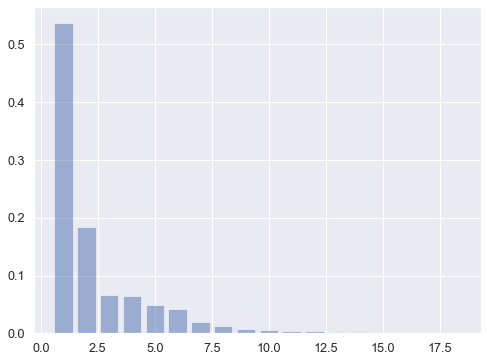

In [45]:
# plotting
plt.figure(figsize=(8,6))

plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=.5,align="center",label="Individual Variance Explained")
plt.step(list(range(1,19)),y=cum_var_exp, label= 'Cumulative explained variance')
plt.xlabel("principle Components")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1") 
ax.set_ylabel("Principal Component 2’"") 
ax.set_title("2 component PCA") 
targets = [['van', 'car', 'bus']]
colors = ["r", "g","b"]
for target, color in zip(targets,colors):
 indicesToKeep = _pca[‘target’] == target
 ax.scatter(x_pca.loc[indicesToKeep, ‘PC1’]
 , x_pca.loc[indicesToKeep, ‘PC2’]
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

SyntaxError: invalid character in identifier (<ipython-input-41-0d8a6faea31d>, line 4)

In [44]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

- First 8 principal components explain 98% of the variance in the data.

In [238]:
pca1=PCA(n_components=8)

In [239]:
pca1.fit(XScaled)

PCA(n_components=8)

In [240]:
X_pca=pca1.transform(XScaled)

In [241]:
#train test split
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,stratify=y,test_size=.3,random_state=1)

In [242]:
print("shape of X_train after PCA",X_train_pca.shape)
print("shape of X_test after PCA",X_test_pca.shape)
print("shape of y_train after PCA",y_train.shape)
print("shape of y_test after PCA",y_test.shape)


shape of X_train after PCA (592, 8)
shape of X_test after PCA (254, 8)
shape of y_train after PCA (592,)
shape of y_test after PCA (254,)


## Modelling,Hyperparameter tuning & Cross Validation¶
### linear kernel

In [243]:
svm_pca_linear=svm.SVC(kernel="linear",class_weight="balanced")

In [244]:
svm_pca_linear.fit(X_train_pca,y_train_pca)
y_pred_pca1=svm_pca_linear.predict(X_test_pca)

In [245]:
print("training accuracy",svm_pca_linear.score(X_train_pca,y_train_pca))
print("test accuracy",svm_pca_linear.score(X_test_pca,y_test_pca))
print("====================Classification report================")
print(classification_report(y_test_pca,y_pred_pca1))


training accuracy 0.8868243243243243
test accuracy 0.8700787401574803
====================Classification report================
              precision    recall  f1-score   support

         bus       0.83      0.89      0.86        65
         car       0.96      0.83      0.89       129
         van       0.77      0.93      0.84        60

    accuracy                           0.87       254
   macro avg       0.85      0.89      0.86       254
weighted avg       0.88      0.87      0.87       254



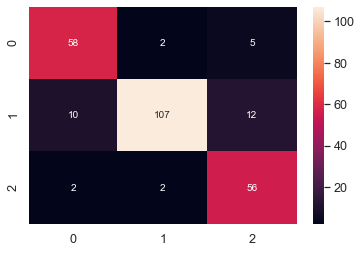

In [246]:
sns.heatmap(confusion_matrix(y_test,y_pred_pca1),annot=True,fmt=".0f")

### rbf kernel

In [257]:
svm_pca_rbf=svm.SVC(kernel="rbf",class_weight="balanced")

In [258]:
svm_pca_rbf.fit(X_train_pca,y_train_pca)
y_pred_pca2=svm_pca_rbf.predict(X_test_pca)

In [259]:
print("training accuracy",svm_pca_rbf.score(X_train_pca,y_train_pca))
print("test accuracy",svm_pca_rbf.score(X_test_pca,y_test_pca))
print("====================Classification report================")
print(classification_report(y_test_pca,y_pred_pca2))

training accuracy 0.9459459459459459
test accuracy 0.9330708661417323
====================Classification report================
              precision    recall  f1-score   support

         bus       0.93      0.97      0.95        65
         car       1.00      0.88      0.94       129
         van       0.83      1.00      0.91        60

    accuracy                           0.93       254
   macro avg       0.92      0.95      0.93       254
weighted avg       0.94      0.93      0.93       254



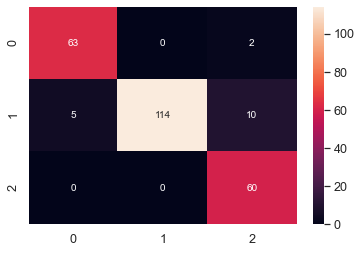

In [260]:
sns.heatmap(confusion_matrix(y_test_pca,y_pred_pca2),annot=True,fmt=".0f");

### Tuning hyper parameters

In [197]:
cv=RepeatedStratifiedKFold(n_splits=10,random_state=1)
param_grid = {'kernel': ['rbf','linear'],
              'C': [1,5,7,10,20],
              'gamma':[.01,.1,.5,1],
              "class_weight":["balanced"]
}
svm_pca_grid=GridSearchCV(svm.SVC(),param_grid=param_grid,scoring='f1_micro',cv=cv,n_jobs=-1)

In [198]:
svm_pca_grid.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=1),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 7, 10, 20], 'class_weight': ['balanced'],
                         'gamma': [0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='f1_micro')

In [254]:
y_pred_grid=svm_pca_grid.predict(X_test_pca)
print("Best params",svm_pca_grid.best_params_)

Best params {'C': 7, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}


In [255]:
print("training accuracy",svm_pca_grid.best_estimator_.score(X_train_pca,y_train_pca).round(3))
print("test accuracy",svm_pca_grid.best_estimator_.score(X_test_pca,y_test_pca).round(3))
print("====================Classification report================")
print(classification_report(y_test_pca,y_pred_grid))

training accuracy 0.99
test accuracy 0.945
====================Classification report================
              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        65
         car       0.98      0.92      0.95       129
         van       0.85      0.97      0.91        60

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.94      0.95       254



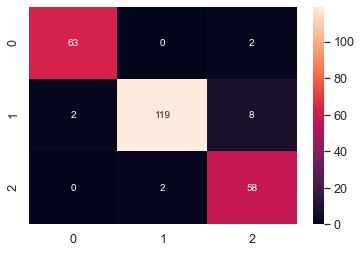

In [256]:
sns.heatmap(confusion_matrix(y_test,y_pred_grid),annot=True,fmt='.0f');

## Conclusion


- Original dataset had 18 features 
- Using SVM with both linear kernel and rbf kernel on these 18 features results in rbf performing slightly better than
  linear kernel
  - we have a unbalanced dataset
  - the overall accuracy of linear kernel with 18 features is 94%
  - the overall accuracy of rbf kernel with 18 features is 95%
  
- when using PCA for dimensionality reduction  
  - rbf kernel is performing better than linear kernel
  - overall accuracy of rbf kernel is 94%
  
- Thus PCA has reduced the feature space from 18 to 8 with very minimal reduction in accuracy from 95 to 94%
- though the accuracy of SVM(rbf) with PCA has a bit reduced but we should not forget that we are getting 95% accuracy with 18 features and 94% accuracy with just 8 features
- Thus SVM model with PCA is performing better